## Trabalho de Conclusão de Curso - Pós-graduação em bioinformática aplicada a genômica médica

Proposta: Criar uma pipeline capaz de concatenar os dados gerados do painel de genes do sequenciamento Ion Torrent PGM, aplicando os filtros cabíveis e gerando como output um report sobre os genes alterados, tipos de muatações frequentes.

1º Passo: Preparar o ambiente baixando as bibliotecas.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

2º Passo: Importar as amostras do drive ou adicioná-las manuamente.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3º Passo: Copiar o caminho da pasta no drive (localizada nos três pontos ao lado do nome da pasta) para que possamos observar os arquivos que estão dentro da pasta.

In [ ]:
!ls "/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe"


4º Passo: Englobar os arquivos com o final 'xlsx' que estão na pasta Pipe, em somente um arquivo. 

In [ ]:
import glob
glob.glob("/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/*.xlsx")

In [ ]:
all_data = pd.DataFrame()
for f in glob.glob("/content/drive/MyDrive/Trabalho_de_Conclusão_de_Curso/Pipe/*.xlsx"):
    df = pd.read_excel(f, index_col=None, header=0)
    all_data = all_data.append(df,ignore_index=True)

In [ ]:
all_data.head()

5º Passo: Limpar os cabeçalhos para não comprometer o processo de leitura.

In [ ]:
new_header = all_data.iloc[0] 
all_data = all_data[2:] 
all_data.columns = new_header


In [ ]:
all_data.head()

6º Passo: Transformando o arquivo em CSV. E removendo os cabeçalhos com o comando, menos o primeiro e salvando em um novo arquivo.

In [ ]:
all_data.to_csv('all_data.csv')

In [ ]:
!grep -v "\#" all_data.csv > all_new.csv
!head all_new.csv

In [ ]:
!head -n 1 all_data.csv > head.txt
!cat head.txt all_new.csv > all_new_head.csv

In [ ]:
 all_new_head =  pd.read_csv("all_new_head.csv")

7º Passo: Limpar todas as pipes na posição function da tabela, pois dificultará o processo de leitura.

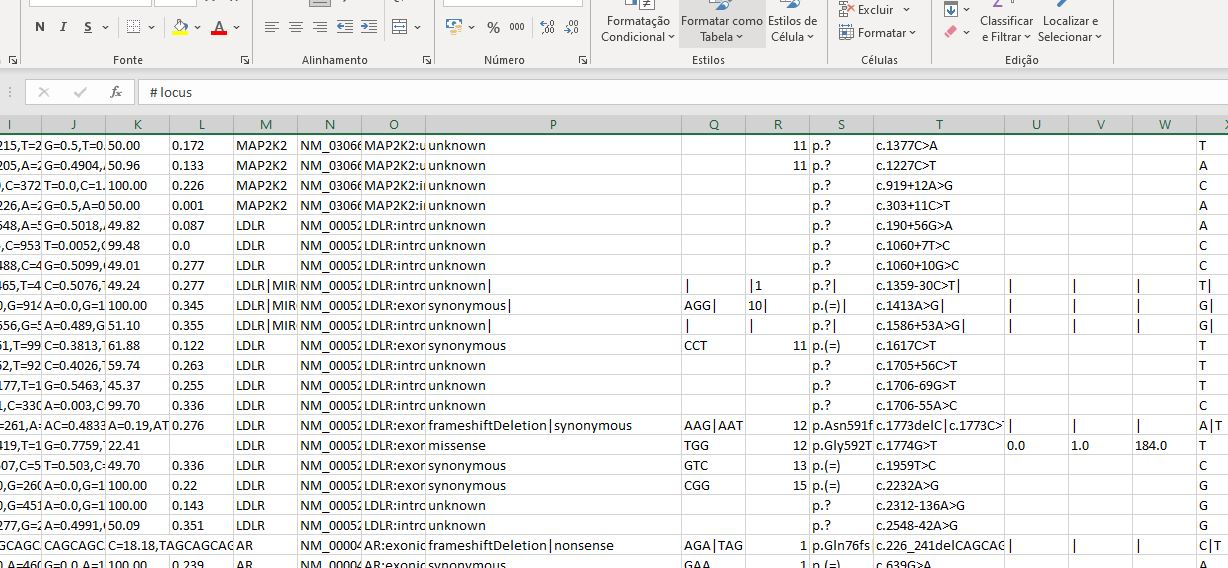

In [ ]:
all_cleaned = all_new_head.replace(to_replace=r'(\|.*)', value='', regex=True)

In [ ]:
all_cleaned.head()

8º Passo: Verificar se há espaços em branco e preenche-los com 0.

In [ ]:
em_branco = np.nan

serie = all_cleaned

In [ ]:
serie.isnull()

In [ ]:
all_cleaned = all_cleaned.fillna(0)
all_cleaned

9º Passo: Verificar alguns parâmetros do DataFrame

In [ ]:
all_cleaned["gene"].value_counts()

In [ ]:
all_cleaned["function"].value_counts()

10º Passo: Aplicar os filtros de cobertura e mutações.


In [ ]:
all_filtered =  all_cleaned[( all_cleaned["coverage"] >= 200) & (( all_cleaned["function"] == "missense") | (all_cleaned["function"] == "nonsense") | ( all_cleaned["function"] == "nonframeshiftDeletion") | ( all_cleaned["function"] == "frameshiftDeletion") | ( all_cleaned["function"] == "frameshiftInsertion") | ( all_cleaned["function"] == "nonframeshiftDeletion"))]

In [ ]:
all_filtered.to_csv('all_filtered.csv')

11º Passo: Verificar alguns dados do novo Data Frame filtrado, como o número de genes mutados e mutações.

In [ ]:
all_filtered["gene"].value_counts()

In [ ]:
all_filtered["function"].value_counts()

In [ ]:
all_filtered[["function", "gene"]].groupby("gene").describe()

12º Passo: Agora vamos observar esses dados gerados de forma gráfica.

In [ ]:
%matplotlib inline

In [ ]:
#COMANDO COM PARÂMETROS DE FONTE PARA O GRÁFICO

plt.rcParams.update({'font.size':50})

In [ ]:
#GERANDO O GRÁFICO DE PIZZA

genes = ['DNAH5', 'CYP21A2', 'BRCA1', 'BRCA2', 'PMS2', 'DPYD', 'SERPINA1', 'PROP1', 'COL1A1', 'CFTR', 'FBN1', 'P3H1', 'COL1A2', 'TP53', 'SERPINF1', 'APC', 'IFITM5', 'BMPR1A', 'RET', 'EPCAM', 'LDLR', 'DNAI1', 'MSH6', 'MUTYH', 'MLH1', 'GHRHR', 'CLCN7', 'HFE', 'FGFR1', 'FGFR2', 'GH1', 'EGFR', 'IDH1', 'GJB2', 'TMEM38B', 'FKBP10', 'KIT', 'AR', 'SOS1', 'GJB6', 'SOX9', 'PTPN11', 'FGFR3', 'MSI1', 'MAP2K2', 'SDHD', 'RAF1']
valores = [159, 86, 71, 57, 53, 48, 48, 40, 33, 31, 29, 29, 27, 26, 25, 24, 22, 20, 18, 17, 16, 15, 15, 14, 13, 12, 11, 10, 9, 9, 7, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) 

plt.figure(figsize=(200,150))
plt.pie(x=valores, labels=genes, startangle=180,explode=explode)

plt.show()

In [ ]:
#GERANDO GRÁFICO DE BARRAS

sns.displot(all_filtered["gene"], aspect=40, bins=50)
plt.ylabel("Número de variantes")
plt.xlabel("function")
plt.title("genes por mutações")

In [ ]:
#GERANDO GRÁFICO DE PIZZA COM PIE CHART

plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

labels = ['Missense', 'Frameshift_Deletion', 'Frameshift_Insertion','Non_Frameshift_Deletion', 'Nonsense']
sizes = [1002, 13, 1, 12, 1]

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

plt.show()

### Removendo as variantes repetidas

1º Passo: Ler o arquivo gerado pelos passos anteiores.

In [ ]:
all_filtered.head()

In [ ]:
#VERIFICANDO O COMPRIMENTO DA TABELA COM AS VARIANTES REPETIDAS

length=  len(all_filtered)
length

2º Passo: Retirando as variantes que se repetem.

In [ ]:
new = all_filtered.drop_duplicates(subset=['protein'])
new

In [ ]:
#VERIFICANDO O TAMANHO DO NOVO ARQUIVO GERADO

length_2 =  len(new)
length_2

In [ ]:
new.to_csv('new.csv')

3º Passo: Verificando os novos parâmetros.

In [ ]:
new["gene"].value_counts()

In [ ]:
new["function"].value_counts()

In [ ]:
new[["function", "gene"]].groupby("gene").describe()

4º Passo: Gerando os novos gráficos

In [ ]:
plt.rcParams.update({'font.size':50})

In [ ]:
genes = ['DNAH5', 'CYP21A2', 'BRCA2', 'BRCA1', 'PMS2', 'P3H1',  'DPYD', 'CFTR', 'FBN1', 'SERPINA1', 'MSH6', 'LDLR', 'COL1A1', 'RET', 'HFE', 'APC', 'MUTYH', 'SERPINF1', 'FKBP10', 'GJB2', 'GHRHR', 'MLH1', 'PROP1', 'DNAI1', 'KIT', 'FGFR3', 'SOX9', 'FGFR2', 'CLCN7', 'SOS1', 'COL1A2', 'FGFR1', 'GJB6', 'AR', 'GH1', 'BMPR1A', 'PTPN11', 'SDHD', 'EPCAM', 'IFITM5', 'MAP2K2', 'TMEM38B', 'EGFR', 'IDH1', 'MSI1', 'RAF1', 'TP53']
valores = [28, 18, 14, 13, 10, 10, 8, 8, 6, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.figure(figsize=(150,100))
plt.pie(x=valores, labels=genes, startangle=180)

plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

labels = ['Missense', 'Frameshift_Deletion', 'Frameshift_Insertion','Non_Frameshift_Deletion', 'Nonsense']
sizes = [194, 8, 1, 1, 1]

patches, texts = plt.pie(sizes, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(aspect="equal"))

rotulos = ['BRCA2', 'BRCA1', 'PMS2', 'MSH6', 'MLH1', 'EPCAM', 'TP53']
data = [14, 13, 10, 5, 3, 1, 1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%\n({:d})'.format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color='w'))

ax.legend(wedges, rotulos,
         title="Genes",
         loc="right",
         bbox_to_anchor=(0.75, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="black")

ax.set_title("Genes mutation")

plt.show()